In [321]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [322]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn

In [323]:
data_x=pd.read_csv("./Diabetes_XTrain.csv")

In [324]:
data_y=pd.read_csv("./Diabetes_YTrain.csv")

In [506]:
X=data_x.values

In [462]:
y=data_y.values

In [507]:
model=KNeighborsClassifier(n_neighbors=17)

In [494]:
model.fit(X,y)

C:\Users\verma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [495]:
test_x=pd.read_csv("./Diabetes_XTest.csv")

In [496]:
test__x=test_x.values

In [497]:
data=model.predict(test__x)

In [498]:
df=pd.DataFrame(data,columns=["Outcome"])

In [505]:
df.to_csv("answer.csv",index=False)

In [502]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [503]:
model.score(X_test,y_test)

0.8115183246073299

In [504]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = sklearn.model_selection.cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\verma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\verma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\verma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\verma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

The optimal number of neighbors is 21


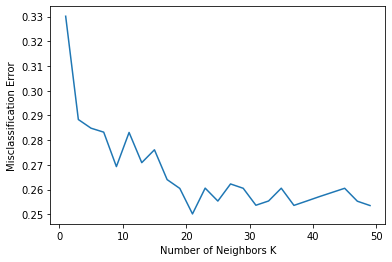

In [484]:
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()